In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import re

In [40]:
connected = []
disconnected = []

szukane = r'(?:\d{1,3}\.)+(?:\d{1,3})'


with open("tarpit.log", "r") as f:
    while True:
        line = f.readline()
        if line == '':
            break
        dt = datetime.strptime(line[:19], '%Y-%m-%d %H:%M:%S')
        if 'TarpitServer: Client' in line:
            state = line.split(' ')[-1][:-1]
            ip = re.findall(szukane, line)[0]
            if state == 'connected':
                connected.append([ip, dt])
            elif state=='disconnected':
                disconnected.append([ip, dt])


In [47]:
connected[-1][1]

datetime.datetime(2022, 6, 6, 12, 47, 54)

In [48]:
entries = []
disc_list = disconnected
still_conn = []

for i, (conn_ip, conn_dt) in enumerate(connected):
    for j, (disco_ip, disc_dt) in enumerate(disc_list):
        if conn_ip == disco_ip:
            entries.append([conn_ip, conn_dt, disc_dt, disc_dt-conn_dt, False])
            disc_list.pop(j)
            break
        if j == len(disc_list):
            entries.append([conn_ip, conn_dt, connected[-1][1], connected[-1][1] - conn_dt, True])

In [58]:
df = pd.DataFrame(entries, columns=['ip_address', 'connect_timestamp', 'disconnect_timestamp', 'time_connected', 'still_connected'])
df.to_csv('conn_disconn_df.csv',index=False)

<AxesSubplot:xlabel='connect_timestamp,connect_timestamp,connect_timestamp,connect_timestamp'>

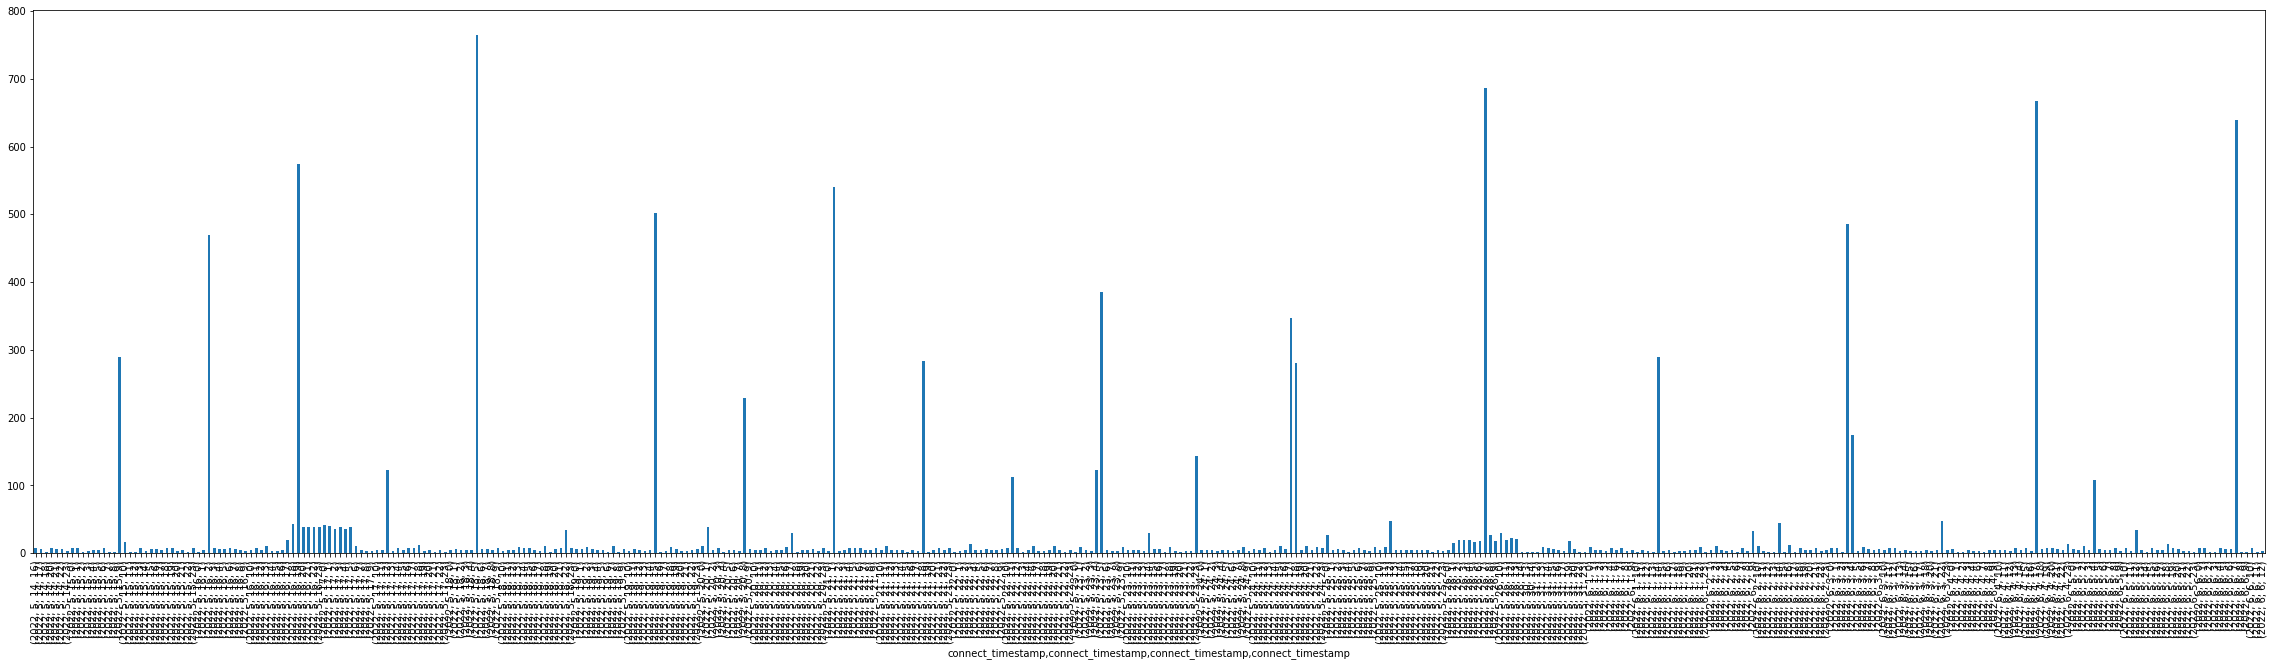

In [67]:
df['ip_address'].groupby([df['connect_timestamp'].dt.year, df['connect_timestamp'].dt.month, df['connect_timestamp'].dt.day, df['connect_timestamp'].dt.hour]).count().plot(kind="bar", figsize=(40,10))
